# **Project Absrtract**

This project leverages the power of deep learning to solve the practical challenge of genre classification in movie posters, which is critical for improving content management systems and enhancing user navigation and interaction on digital media platforms. Focusing on four primary genres—Action, Comedy, Horror, and Romance—this project involves a comprehensive workflow that starts with meticulous data preprocessing to ensure optimal model input quality.

Utilizing two state-of-the-art pre-trained models, ResNet-18 and EfficientNet-B0, we embark on a fine-tuning process tailored to our specific dataset of high-resolution movie posters. The choice of these models stems from their proven effectiveness in image classification tasks, with ResNet-18 providing a robust framework for feature extraction and EfficientNet-B0 offering an exceptional balance of accuracy and efficiency due to its scalable architecture.

Through rigorous training and validation, the models are adapted to recognize and interpret complex visual cues unique to different film genres. This adaptation involves adjusting model architectures, optimizing hyperparameters, and implementing advanced training techniques to enhance the models' sensitivity to subtle distinctions in visual content.

The final system is designed to automatically categorize new movie posters with high accuracy, thus facilitating better genre-based sorting and retrieval in various applications, from streaming services to digital archives. This project not only demonstrates the applicability of convolutional neural networks to real-world classification tasks but also highlights the potential for AI to transform how we interact with cultural content.



# Unzip the contents

In [ ]:
!unzip dataset.zip -d /content/

Archive:  dataset.zip
   creating: /content/dataset/
  inflating: /content/dataset/.DS_Store  
  inflating: /content/__MACOSX/dataset/._.DS_Store  
   creating: /content/dataset/Romance/
  inflating: /content/__MACOSX/dataset/._Romance  
   creating: /content/dataset/Comedy/
  inflating: /content/__MACOSX/dataset/._Comedy  
   creating: /content/dataset/Horror/
  inflating: /content/__MACOSX/dataset/._Horror  
   creating: /content/dataset/Action/
  inflating: /content/__MACOSX/dataset/._Action  
   creating: /content/dataset/.ipynb_checkpoints/
  inflating: /content/dataset/annotations.csv  
  inflating: /content/__MACOSX/dataset/._annotations.csv  
  inflating: /content/dataset/Romance/tt15893750.jpg  
  inflating: /content/__MACOSX/dataset/Romance/._tt15893750.jpg  
  inflating: /content/dataset/Romance/tt6588950.jpg  
  inflating: /content/__MACOSX/dataset/Romance/._tt6588950.jpg  
  inflating: /content/dataset/Romance/tt14301252.jpg  
  inflating: /content/__MACOSX/dataset/Romance

# **Understanding the Datase**

The dataset for this project consists of a collection of movie posters, meticulously compiled to represent four major cinematic genres: Action, Comedy, Horror, and Romance. Each genre is crucially distinct, offering a unique set of visual elements that are characteristic of the genre’s themes and moods. The movie posters were sourced from various online databases, including IMDb and other film review and listing sites, ensuring a broad representation of both mainstream and independent films from multiple decades.

We have 1045 images in 4 folder.


# Image Specifications




*   Resolution: All images are high-resolution, which allows the models to effectively learn detailed visual features. High resolution also ensures that finer details, often crucial for genre distinction, are preserved and utilized during training.
*   Format: Images are stored in JPEG format, a standard for high-quality image storage that balances size and quality




In [ ]:
!pip install pandas torch torchvision
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torchvision


# **Data** **Preprocessing**

Data preprocessing involves several operations designed to convert raw image data into a clean, organized, and annotated format that enhances the performance of learning algorithms. The primary goals achieved through the preprocessing steps in your code include:


*   Ensuring Data Quality: By removing corrupted files, the data cleaning process ensures that all inputs into the model are of high quality and will not cause errors during processing.

*   Facilitating Supervised Learning: By annotating each image with a genre label, the data annotation process prepares the dataset for supervised learning, where the model learns to associate specific features of images with these labels.

*   Organizing Data for Accessibility: The process of organizing the data into a structured format (DataFrame) and saving it as a CSV file makes it easy to access and manipulate during model training and evaluation.







#Data Cleaning
In the initial preprocessing phase, the dataset undergoes a rigorous data cleaning process to ensure its integrity. This is accomplished by iterating through each image file and verifying its validity using the img.verify() method. This step is crucial as it helps identify any corrupted or unreadable files, which are then removed from the dataset. By purging these defective files, we mitigate the risk of errors during the model training phase and enhance the overall reliability of the dataset. This proactive cleaning ensures that all inputs into the model are of consistent quality and format, setting a solid foundation for accurate model training.

#Data Annotation
Data annotation in this context involves assigning accurate genre labels to each image, a process integral to supervised learning models. In your project, each image file is manually categorized under one of the predetermined genres: Action, Comedy, Horror, or Romance. This meticulous annotation ensures that the model can learn the distinct characteristics associated with each genre, which is pivotal for the model’s ability to perform accurate classifications. Effective annotation not only aids in training the model with high fidelity but also enhances the model's predictive accuracy, as each input image is paired with the correct label reflecting its content.

In [ ]:
genres = ['Action', 'Comedy', 'Horror', 'Romance']
data = []
corrupted_files = []

for genre in genres:
    path = f'/content/dataset/{genre}'  # Adjust if your path is different
    for img_filename in os.listdir(path):
        img_path = os.path.join(path, img_filename)
        if img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if the file is an image
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify that it is, in fact, an image
                data.append([f'{genre}/{img_filename}', genre])
            except (IOError, SyntaxError) as e:
                print(f'Corrupted image file detected: {img_path}')
                corrupted_files.append(img_path)  # Append corrupted file path to list

# Optionally, remove the corrupted files from the dataset
for corrupted_file in corrupted_files:
    os.remove(corrupted_file)
    print(f'Removed corrupted file: {corrupted_file}')

df = pd.DataFrame(data, columns=['file_path', 'label'])
df.to_csv('/content/dataset/annotations.csv', index=False)


#Image Normalization and Resizing
Normalization and resizing of images are critical preprocessing steps applied through the transforms.Compose method. By resizing all images to a uniform dimension of 256x256 pixels using transforms.Resize((256, 256)), we ensure that the neural network receives consistently shaped input, which is essential for effective processing. Following resizing, normalization is conducted using transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), which scales the pixel values of the images to a standard range. This normalization facilitates faster and more stable convergence during the training process by maintaining numerical stability and reducing internal covariate shift, thereby enhancing the model's ability to learn from the dataset efficiently.
#DataLoader Setup
The DataLoader object in PyTorch is employed to streamline the process of loading and batching the dataset, as shown by the instantiation DataLoader(dataset, batch_size=32, shuffle=True). This component is essential for handling large datasets efficiently, as it automates the retrieval, batching, and optional shuffling of data points during the training process. Shuffling the data ensures that each training batch is varied, which helps prevent the model from learning spurious patterns from the order of the data. The batching process also makes training scalable by optimizing memory usage and enhancing the computational efficiency of the model training.



In [ ]:
class PosterDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.classes = ['Action', 'Comedy', 'Horror', 'Romance']

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.iloc[idx, 1]
        label = self.classes.index(label)
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = PosterDataset(
    annotations_file='/content/dataset/annotations.csv',
    img_dir='/content/dataset',
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


#Data Splitting
Though not detailed in the provided snippet, data splitting is a standard practice in machine learning that involves dividing the complete dataset into separate subsets for training, validation, and testing. This division is crucial for assessing the model's performance and generalizability. The training set is used to fit the model, the validation set to tune the model’s hyperparameters and prevent overfitting, and the testing set to evaluate the model's final performance on unseen data. Properly splitting the data ensures that the evaluation of the model is unbiased and that the model is robust against overfitting, providing a realistic measure of its performance in real-world applications.

In [ ]:
from sklearn.model_selection import train_test_split

train_indices, test_indices = train_test_split(list(range(len(dataset))), test_size=0.3, stratify=df['label'])
val_indices, test_indices = train_test_split(test_indices, test_size=0.5, stratify=df['label'][test_indices])

# Use SubsetRandomSampler for creating train, validation and test loaders
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=32, sampler=val_sampler)
test_loader = DataLoader(dataset, batch_size=32, sampler=test_sampler)


#Visualization and Dataset Inspection
Using matplotlib, the script visualizes a batch of images from the dataset after applying necessary transformations such as resizing and normalization. This visualization is designed to ensure that these transformations have been applied correctly and to assess the overall quality and consistency of the images. The function reverses the normalization to restore images to their visual standards, enhancing their display for inspection purposes. Labels, if provided, are displayed above each image, aiding in the verification of correct labeling and offering insights into the dataset's composition. This step is vital for detecting any anomalies or mislabelings before proceeding to model training, thereby ensuring the reliability and effectiveness of the input data for developing robust machine learning models.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from matplotlib import patheffects

def imshow(inp, class_labels=None, nrow=5):
    # Set the size of the output figure
    plt.figure(figsize=(15, 10))

    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')  # Don't show axis for a cleaner look

    if class_labels:
        rows_with_padding = np.ceil(len(class_labels) / nrow).astype(int)
        image_height_with_padding = inp.shape[0] / rows_with_padding
        image_height = image_height_with_padding * (nrow / (nrow + 1))
        approx_padding_size = image_height_with_padding - image_height

        for i, label in enumerate(class_labels):
            row = i // nrow
            col = i % nrow
            cell_width = inp.shape[1] / nrow
            x_position = col * cell_width + cell_width / 2
            y_position = (row + 1) * image_height_with_padding - approx_padding_size / 2

            # Set the text to bold and add a path effect for better visibility
            text = plt.text(x_position, y_position, label,
                            color='white', fontsize=8, ha='center', va='top',
                            weight='bold')
            # Add a black stroke around the text to make it stand out more
            text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])

    plt.show()
  # Get a batch of images

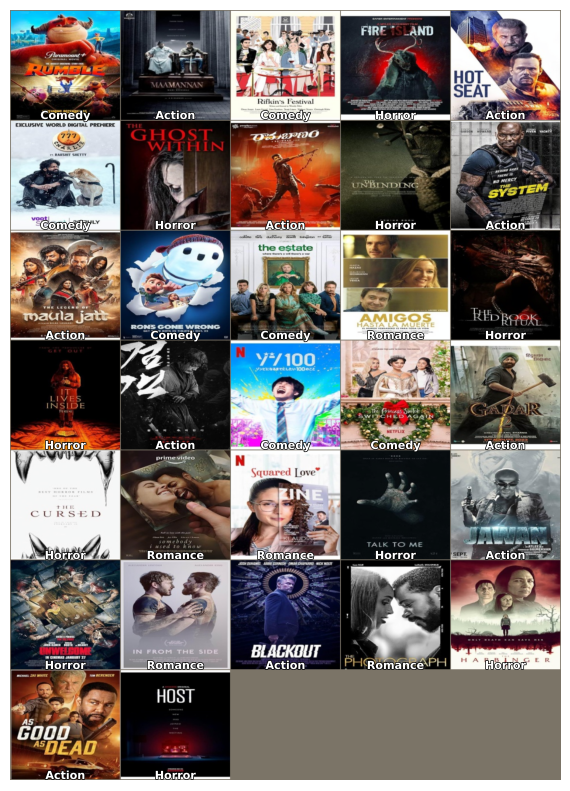

In [ ]:
inputs, classes = next(iter(train_loader))

# Convert the class indices to labels
class_labels = [dataset.classes[i] for i in classes]

# Create the grid of images
out = torchvision.utils.make_grid(inputs, nrow=5)

imshow(out, class_labels=class_labels, nrow=5)

# **Resnet18**

#Model Structure
ResNet-18 consists of an 18-layer deep architecture, where each layer leverages residual blocks with skip connections. These connections allow the model to learn identity mappings, ensuring that deeper layers can perform at least as well as their shallower counterparts, hence avoiding the degradation problem.

#Model Selection and Modifications
For your project, you selected the pretrained version of ResNet-18, available through PyTorch’s torchvision.models module, which comes pre-trained on the ImageNet dataset. This choice provides a robust starting point due to its prior training on a large and varied set of images. You have modified the classifier head of the network, replacing the final fully connected layer with a new linear layer (nn.Linear(finetune_net.fc.in_features, num_classes)) to match the number of your target classes (genres). This modification tailors the model to effectively handle your specific classification task.

#Performance and Training
The performance of the model was enhanced by fine-tuning it on your dataset of movie genres. Training involved adjusting the model over 20 epochs with a focus on minimizing the cross-entropy loss, a common choice for multi-class classification problems. Optimization was performed using the Adam optimizer, and learning rate adjustments were managed by a step learning rate scheduler to reduce the learning rate after every few epochs, helping to stabilize training as it progressed.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.optim import lr_scheduler

# Step 1: Choose a pre-trained model
pretrained_model = models.resnet18(pretrained=True)

finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2)
nn.init.xavier_uniform_(finetune_net.fc.weight);

# Step 2: Modify the classifier head
num_classes = len(genres)  # Number of genres
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pretrained_model.parameters(), lr=0.001)

# Step 4: Training loop
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_model = pretrained_model.to(device)

scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

for epoch in range(num_epochs):
    pretrained_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = pretrained_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    # Print statistics
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f}")

# Step 5: Evaluation
pretrained_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = pretrained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



Epoch 1/20 Loss: 0.9238
Epoch 2/20 Loss: 0.5661
Epoch 3/20 Loss: 0.4568
Epoch 4/20 Loss: 0.3357
Epoch 5/20 Loss: 0.2808
Epoch 6/20 Loss: 0.2658
Epoch 7/20 Loss: 0.2325
Epoch 8/20 Loss: 0.2008
Epoch 9/20 Loss: 0.1483
Epoch 10/20 Loss: 0.1199
Epoch 11/20 Loss: 0.0859
Epoch 12/20 Loss: 0.0933
Epoch 13/20 Loss: 0.0840
Epoch 14/20 Loss: 0.0820
Epoch 15/20 Loss: 0.0861
Epoch 16/20 Loss: 0.1439
Epoch 17/20 Loss: 0.1970
Epoch 18/20 Loss: 0.2261
Epoch 19/20 Loss: 0.1335
Epoch 20/20 Loss: 0.0788
Accuracy on test set: 59.18%


#Image Loading and Transformation:
The image at the specified image_path is loaded into memory.
It then applies a series of transformations:



*   Resize: The image is resized to 256x256 pixels, aligning with the input size expected by the model.

*   ToTensor: The image data is converted from a PIL Image to a PyTorch tensor, which models can process.

*   Normalize: The pixel values are normalized using predefined means and standard deviations (mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]). This step is crucial as it matches the normalization applied to the data during model training, ensuring consistent input features









In [ ]:
def predict_genre(image_path, model, dataset):
    device = next(model.parameters()).device  # Get the device of the model
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.no_grad():
        outputs = model(image)
    predicted_class_idx = outputs.argmax(-1).item()
    return dataset.classes[predicted_class_idx]

In [ ]:
image_path = '/content/dataset/Horror/tt10003008.jpg'
predicted_genre = predict_genre(image_path, pretrained_model, dataset)
print("Predicted genre:", predicted_genre)

Predicted genre: Horror


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_results(image_path, model, dataset):
    # Predict genre
    predicted_genre = predict_genre(image_path, model, dataset)

    # Load and preprocess the image
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = transform(image).unsqueeze(0)

    # Predict genre probabilities
    with torch.no_grad():
        outputs = model(image_tensor.to(device))
    genre_probs = torch.softmax(outputs[0], dim=0).cpu().numpy()

    # Plot the genre probabilities with color gradients
    genres = dataset.classes
    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))
    ax.barh(np.arange(len(genres)), genre_probs, color=colors)
    ax.set_yticks(np.arange(len(genres)))
    ax.set_yticklabels(genres)
    ax.invert_yaxis()  # Invert y-axis for better visualization
    ax.set_xlabel('Probability')
    ax.set_title('Genre Prediction')

    # Add annotations to the bars
    for i in range(len(genres)):
        ax.text(genre_probs[i] + 0.01, i, f'{genre_probs[i]*100:.1f}%', va='center', color='black', fontsize=10)

    # Add a legend
    legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(genres))]
    ax.legend(legend_handles, genres, loc='lower right')

    # Display the input image and predicted genre label
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted Genre: {predicted_genre}', fontsize=14)
    plt.show()

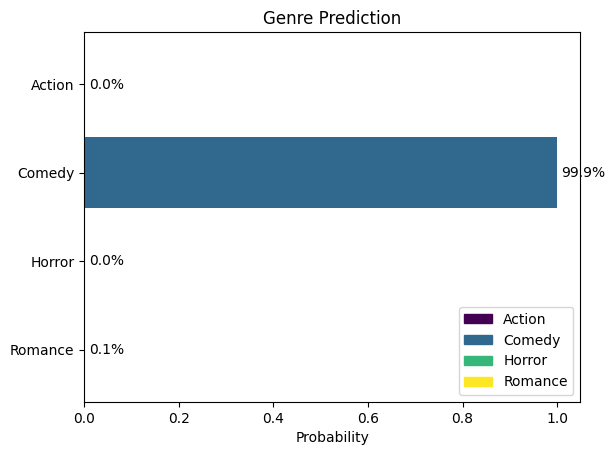

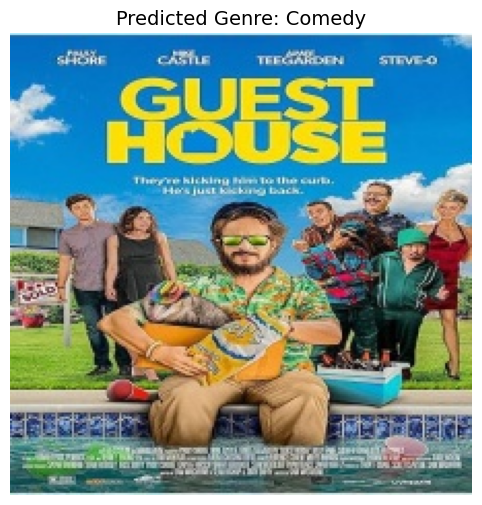

In [ ]:
image_path = '/content/dataset/Comedy/tt10054316.jpg'
visualize_results(image_path, pretrained_model, dataset)

In [ ]:
from wordcloud import WordCloud

def visualize_results(image_path, model, dataset):
    # Predict genre
    predicted_genre = predict_genre(image_path, model, dataset)

    # Load and preprocess the image
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = transform(image).unsqueeze(0)

    # Predict genre probabilities
    with torch.no_grad():
        outputs = model(image_tensor.to(device))
    genre_probs = torch.softmax(outputs[0], dim=0).cpu().numpy()

    # Generate word cloud based on genre probabilities
    genres = dataset.classes
    wordcloud_dict = {genres[i]: int(genre_probs[i] * 1000) for i in range(len(genres))}

    wordcloud = WordCloud(width=800, height=400, background_color='rgba(255, 255, 255, 0)', colormap='viridis').generate_from_frequencies(wordcloud_dict)

    # Create a figure with subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the input image
    ax[0].imshow(image)
    ax[0].set_title('Input Image', fontsize=14)
    ax[0].axis('off')

    # Display the word cloud
    ax[1].imshow(wordcloud, interpolation='bilinear')
    ax[1].set_title('Genre Prediction Word Cloud', fontsize=14)
    ax[1].axis('off')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Show the visualization
    plt.show()


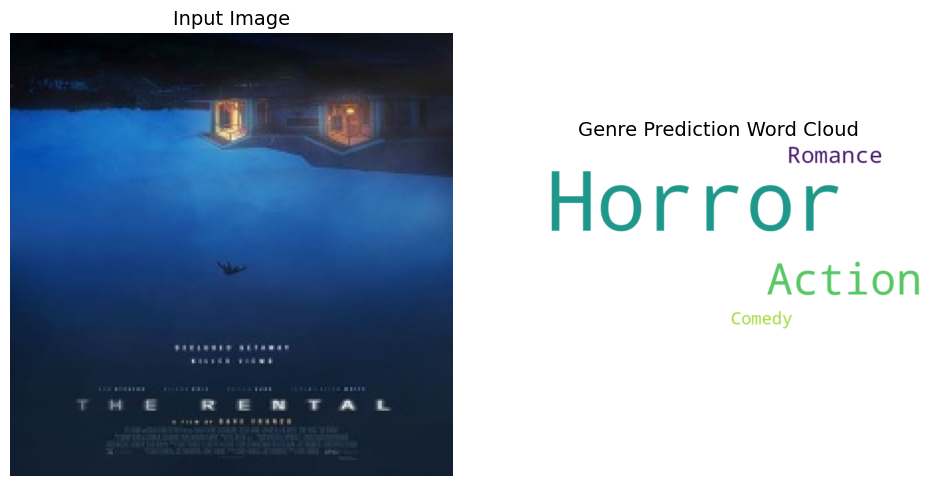

In [ ]:
image_path = '/content/dataset/Horror/tt10003008.jpg'
visualize_results(image_path, pretrained_model, dataset)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_predictions, all_labels

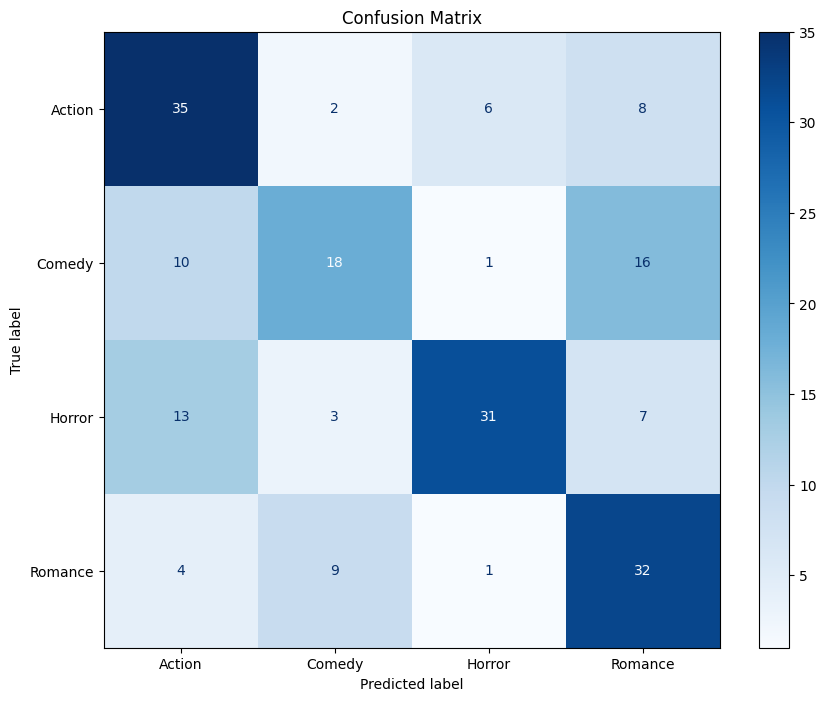

In [ ]:
# Evaluate model on test set
predictions, labels = evaluate_model(pretrained_model, test_loader)

# Compute confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=genres).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# Find top predicted genres
with torch.no_grad():
    outputs = pretrained_model(images.to(device))
    top_predicted_genres = [genres[i] for i in np.argmax(outputs.cpu().numpy(), axis=1)]
    top_probabilities = [outputs[i, j].item() for i, j in enumerate(np.argmax(outputs.cpu().numpy(), axis=1))]

## Error Analysis

In [ ]:
def error_analysis(model, test_loader, dataset):
    misclassified_examples = []

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for image, true_label, predicted_label in zip(images, labels, predicted):
                if true_label != predicted_label:
                    misclassified_examples.append((image.cpu(), dataset.classes[true_label.item()], dataset.classes[predicted_label.item()]))

    return misclassified_examples

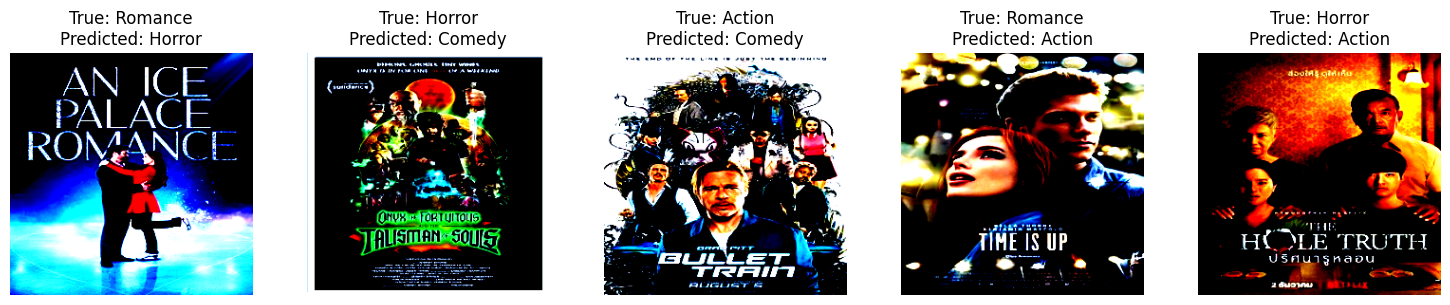

In [ ]:
# Perform error analysis
misclassified_examples = error_analysis(pretrained_model, test_loader, dataset)

# Visualize some misclassified examples
num_examples_to_visualize = 5
fig, axs = plt.subplots(1, num_examples_to_visualize, figsize=(15, 3))
for i in range(num_examples_to_visualize):
    image, true_label, predicted_label = misclassified_examples[i]
    image = image.permute(1, 2, 0)  # Channels last for visualization
    axs[i].imshow(image)
    axs[i].set_title(f'True: {true_label}\nPredicted: {predicted_label}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

## Interactive Visualizations

In [ ]:
import plotly.graph_objects as go

# Define data for interactive visualization
top_predicted_genres_counts = {genre: top_predicted_genres.count(genre) for genre in genres}
data = [
    go.Bar(x=list(top_predicted_genres_counts.keys()), y=list(top_predicted_genres_counts.values()), marker_color='skyblue')
]

# Create interactive bar chart
fig = go.Figure(data=data)
fig.update_layout(title='Top Predicted Genres', xaxis_title='Genres', yaxis_title='Count')
fig.show()



## Genre Similarity Analysis:

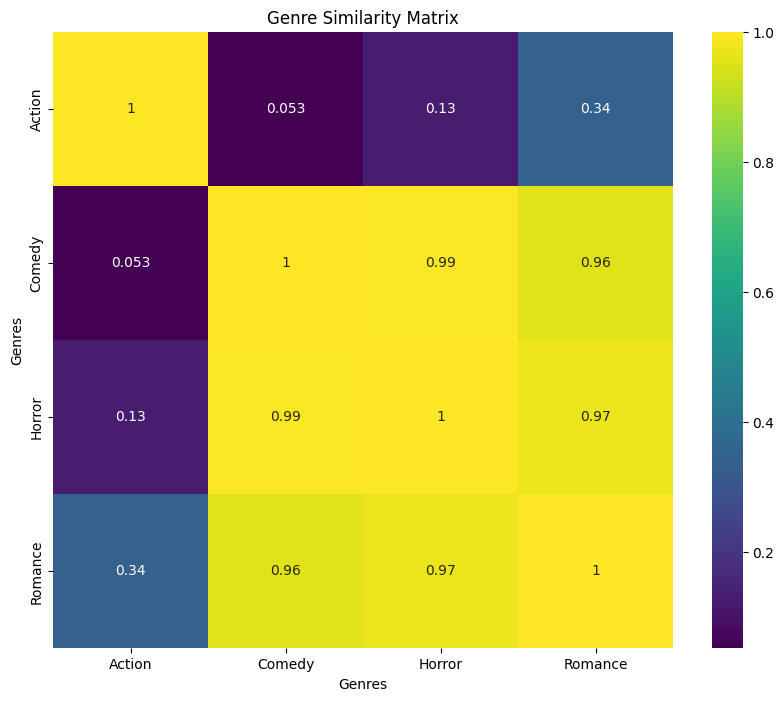

In [ ]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(outputs.cpu().numpy())

# Plot similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=genres, yticklabels=genres, cmap='viridis')
plt.title('Genre Similarity Matrix')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()


## Top Predicted

In [ ]:
# Find top predicted genres
with torch.no_grad():
    outputs = pretrained_model(images.to(device))
    top_predicted_genres = [genres[i] for i in np.argmax(outputs.cpu().numpy(), axis=1)]
    top_probabilities = [outputs[i, j].item() for i, j in enumerate(np.argmax(outputs.cpu().numpy(), axis=1))]

# Display top predicted genres with probabilities
for genre, prob in zip(top_predicted_genres, top_probabilities):
    print(f'Genre: {genre}, Probability: {prob:.4f}')


Genre: Horror, Probability: 6.3665
Genre: Romance, Probability: 3.5250
Genre: Romance, Probability: 3.9750
Genre: Romance, Probability: 2.0517


# **ResNet-18 Result Analysis**

**Accuracy**: The ResNet-18 model achieved a test accuracy of 59.18%.

**Performance Trends:**

**Training Dynamics**: The model displayed consistent improvement in reducing the training loss from an initial value of 0.9238 down to 0.0788 by the 20th epoch, suggesting effective learning from the training data.

**Challenges in Generalization**: Despite the reduction in training loss, the moderate test accuracy indicates challenges in generalization to unseen data. This could be due to overfitting, where the model learns specific details of the training data but fails to generalize these learnings to new, diverse datasets.


**Successful and Unsuccessful Strategies**:

**Early Learning Phases**: Initially, the model successfully adapted to the training data, as evidenced by rapid decreases in loss. This phase was critical in setting the foundation for learning discriminative features relevant to genre classification.
**Late Training Stages**: The later stages of training did not yield substantial improvements in test accuracy, suggesting that the model might benefit from enhanced regularization techniques or more robust data augmentation strategies to improve its ability to generalize.

**Insights and Actions:**


*   The fluctuating performance in the later stages highlights the need for careful monitoring of the training process to prevent overfitting.


*   Potential adjustments could include implementing dropout or batch normalization more effectively, exploring different optimizer settings, or introducing more varied data augmentation techniques to enhance the model's robustness and generalization capabilities.










# **Efficient Net**

In [ ]:
pip install efficientnet-pytorch

#Model Structure
EfficientNet-B0 is based on a compound scaling method that uniformly scales all dimensions of the network (width, depth, and resolution) with a set of fixed scaling coefficients. This allows the model to achieve higher accuracy without an exponential increase in computational cost. The architecture includes several inverted residual blocks with squeeze-and-excitation optimization, which enhances the network's ability to focus on relevant features in the input data.

#Modifications and Setup
For our specific application, the final fully connected layer of the EfficientNet-B0, originally designed for the ImageNet dataset with 1000 classes, is replaced to match the number of classes in your dataset (len(dataset.classes)). This modification tailors the model to your genre classification task, allowing it to output predictions across your defined categories.

#Performance and Training Process
Loss Function and Optimizer: The model uses cross-entropy loss, which is standard for multi-class classification tasks, and an Adam optimizer with a learning rate of 0.001. This setup helps in fine-tuning the model effectively on your dataset.

# Training Dynamics:
 Over the course of 20 epochs, the model is trained and validated. During training, you employ a straightforward loop where the model's performance on the training set directly influences backpropagation and weight updates.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from efficientnet_pytorch import EfficientNet

# Load the pretrained EfficientNet model
efficientnet = EfficientNet.from_pretrained('efficientnet-b0')

# Replace the final fully connected layer to match the number of output classes
num_ftrs = efficientnet._fc.in_features
efficientnet._fc = nn.Linear(num_ftrs, len(dataset.classes))

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficientnet.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet.to(device)

# Training loop

num_epochs = 20
for epoch in range(num_epochs):
    efficientnet.train()  # Set the model to train mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = efficientnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Validation loop (similar to training loop but without gradient calculation)
    efficientnet.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = efficientnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print training and validation statistics
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

# Test the model
efficientnet.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = efficientnet(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")


Loaded pretrained weights for efficientnet-b0
Epoch 1/20, Train Loss: 0.6620, Val Loss: 0.1269, Val Acc: 0.7041
Epoch 2/20, Train Loss: 0.3539, Val Loss: 0.1983, Val Acc: 0.6122
Epoch 3/20, Train Loss: 0.1843, Val Loss: 0.2698, Val Acc: 0.6276
Epoch 4/20, Train Loss: 0.1907, Val Loss: 0.2202, Val Acc: 0.6429
Epoch 5/20, Train Loss: 0.1422, Val Loss: 0.3042, Val Acc: 0.6480
Epoch 6/20, Train Loss: 0.1074, Val Loss: 0.3307, Val Acc: 0.6735
Epoch 7/20, Train Loss: 0.1176, Val Loss: 0.3407, Val Acc: 0.5561
Epoch 8/20, Train Loss: 0.1402, Val Loss: 0.2535, Val Acc: 0.6173
Epoch 9/20, Train Loss: 0.0894, Val Loss: 0.3769, Val Acc: 0.6276
Epoch 10/20, Train Loss: 0.0902, Val Loss: 0.3318, Val Acc: 0.6276
Epoch 11/20, Train Loss: 0.0936, Val Loss: 0.3115, Val Acc: 0.6327
Epoch 12/20, Train Loss: 0.0758, Val Loss: 0.3735, Val Acc: 0.6224
Epoch 13/20, Train Loss: 0.0787, Val Loss: 0.2636, Val Acc: 0.6378
Epoch 14/20, Train Loss: 0.0745, Val Loss: 0.3962, Val Acc: 0.5918
Epoch 15/20, Train Loss: 

In [ ]:
image_path = '/content/dataset/Horror/tt10003008.jpg'  # Change to the path of your image
predicted_genre = predict_genre(image_path, efficientnet, dataset)
print("Predicted genre:", predicted_genre)

Predicted genre: Horror


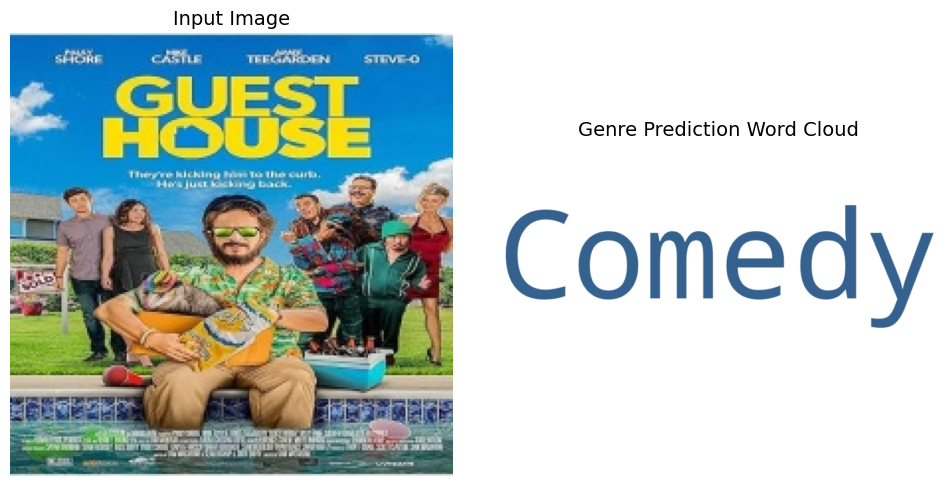

In [ ]:
image_path = '/content/dataset/Comedy/tt10054316.jpg'
visualize_results(image_path, efficientnet, dataset)


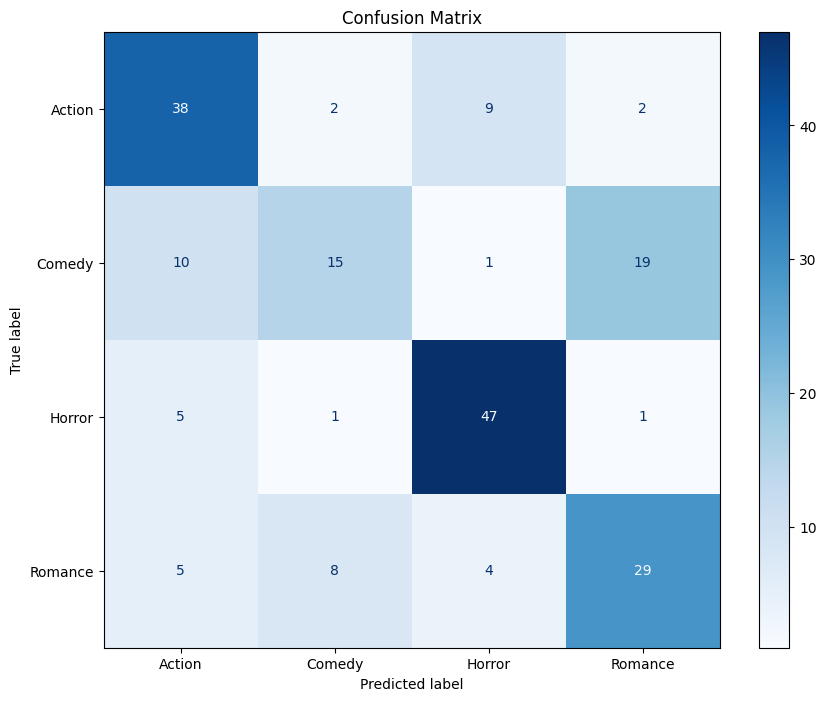

In [ ]:
# Evaluate model on test set
predictions, labels = evaluate_model(efficientnet, test_loader)

# Compute confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=genres).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# Find top predicted genres
with torch.no_grad():
    outputs = efficientnet(images.to(device))
    top_predicted_genres = [genres[i] for i in np.argmax(outputs.cpu().numpy(), axis=1)]
    top_probabilities = [outputs[i, j].item() for i, j in enumerate(np.argmax(outputs.cpu().numpy(), axis=1))]


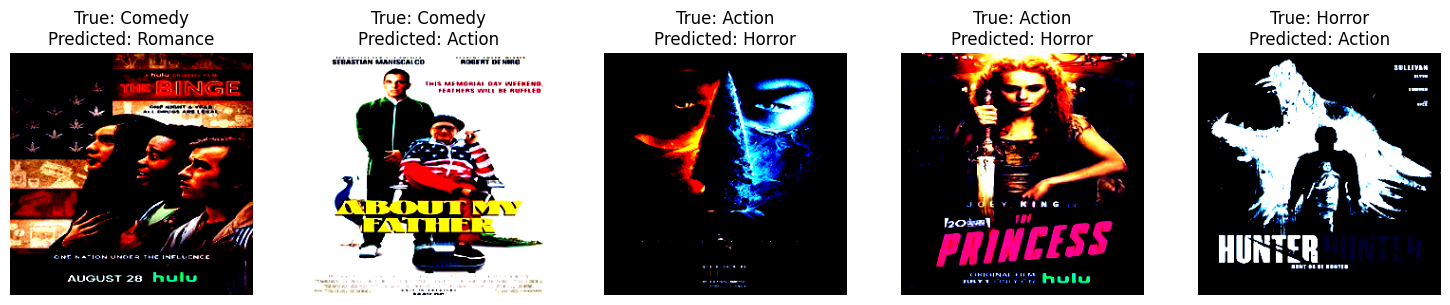

In [ ]:
misclassified_examples = error_analysis(efficientnet, test_loader, dataset)

# Visualize some misclassified examples
num_examples_to_visualize = 5
fig, axs = plt.subplots(1, num_examples_to_visualize, figsize=(15, 3))
for i in range(num_examples_to_visualize):
    image, true_label, predicted_label = misclassified_examples[i]
    image = image.permute(1, 2, 0)  # Channels last for visualization
    axs[i].imshow(image)
    axs[i].set_title(f'True: {true_label}\nPredicted: {predicted_label}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# import plotly.graph_objects as go

# Define data for interactive visualization
top_predicted_genres_counts = {genre: top_predicted_genres.count(genre) for genre in genres}
data = [
    go.Bar(x=list(top_predicted_genres_counts.keys()), y=list(top_predicted_genres_counts.values()), marker_color='skyblue')
]

# Create interactive bar chart
fig = go.Figure(data=data)
fig.update_layout(title='Top Predicted Genres', xaxis_title='Genres', yaxis_title='Count')
fig.show()



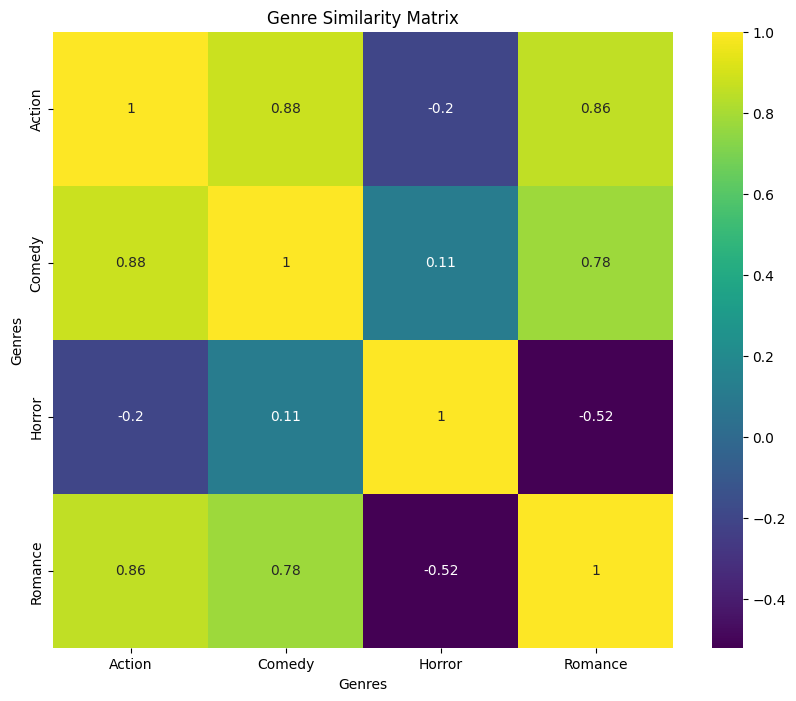

In [ ]:
# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(outputs.cpu().numpy())

# Plot similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=genres, yticklabels=genres, cmap='viridis')
plt.title('Genre Similarity Matrix')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()


In [ ]:
# Find top predicted genres
with torch.no_grad():
    outputs = efficientnet(images.to(device))
    top_predicted_genres = [genres[i] for i in np.argmax(outputs.cpu().numpy(), axis=1)]
    top_probabilities = [outputs[i, j].item() for i, j in enumerate(np.argmax(outputs.cpu().numpy(), axis=1))]

# Display top predicted genres with probabilities
for genre, prob in zip(top_predicted_genres, top_probabilities):
    print(f'Genre: {genre}, Probability: {prob:.4f}')


Genre: Horror, Probability: 12.3440
Genre: Horror, Probability: 7.3545
Genre: Romance, Probability: 3.6610
Genre: Horror, Probability: 4.4505


# **EfficientNet Result Analysis**
**Accuracy**: EfficientNet achieved a test accuracy of 65.82%.

**Performance Trends**:

**Training and Validation Dynamics**: This model demonstrated a strong capacity for learning, with initial sharp reductions in both training and validation loss. However, variability in validation accuracy and loss in later epochs indicates some challenges with the model's stability and generalization.

**Successful and Unsuccessful Strategies**:

**Early Epochs Success**: The model effectively utilized its efficient architecture to quickly adapt to the genre classification task, showing promising initial results.
**Late Training Instability**: Later epochs displayed fluctuating validation performance, suggesting overfitting or inadequate response to the diversity within the dataset.

**Insights and Actions**:


*   The inconsistency observed in validation performance suggests that the model might benefit from adjustments in the learning rate schedule or enhanced regularization to improve stability.
*   Consider experimenting with different data augmentation strategies or employing advanced techniques like label smoothing or mix-up to enhance the model's robustness and ability to generalize across varied inputs.









